In [1]:
import pandas as pd

# Assignment 1: pd.Concat

#### Concatenating DataFrames? (_Retail Head of Analytics_)

Combine the 2014 and 2015 data you wrote out in the last section into a single dataframe. 

Then delete the transactions DataFrame (there is a handy base Python keyword for this).

In [ ]:
# Code to read in transactions data if you need to re-create CSV/Excel files from section 8 
# NOTE: You won't have the extra columns we created but it won't matter for this assignment

# transactions = pd.read_csv("../retail/transactions.csv", parse_dates=["date"])

# Excel

# with pd.ExcelWriter("DataForChandler.xlsx") as writer:
#     for year in range(2013, 2018):
#         transactions.loc[transactions["date"].dt.year == year].to_excel(
#             writer, sheet_name=str(year)
#         )
        
# CSV  

# for year in range(2013, 2018):
#     transactions.loc[transactions["date"].dt.year == year].to_csv(
#         f"transactions_{year}.csv"
#     )

In [2]:
# CSV

# Read in two csv files and concatenate them into a single DataFrame

transactions_csv = pd.concat(
    (pd.read_csv("../data/transactions_2014.csv"), 
     pd.read_csv("../data/transactions_2015.csv")),
).drop(["Unnamed: 0"], axis=1)

In [5]:
# Excel 

# Read in two Excel sheets and concatenate them into a single DataFrame

transactions_excel = pd.concat(
    pd.read_excel("../data/DataForChandler.xlsx", sheet_name=[1, 2]),  #  specify sheets 1 and 2 to grab correct years
    ignore_index=True  #  specify to create consecutive index across sheets
).drop(["Unnamed: 0"], axis=1)  #  drop index col

In [3]:
# inspect head of df

transactions_csv.head()

,Date,Store_Number,Transaction_Count,target_pct,met_target,bonus_payable,month,day_of_week
0,2014-01-01,25,840,0.3360,False,False,1,2
1,2014-01-01,36,487,0.1948,False,False,1,2
2,2014-01-02,1,1875,0.7500,False,False,1,3
3,2014-01-02,2,2122,0.8488,False,False,1,3
4,2014-01-02,3,3350,1.3400,True,False,1,3


In [6]:
transactions_excel.head()

,Date,Store_Number,Transaction_Count,target_pct,met_target,bonus_payable,month,day_of_week
0,2014-01-01,25,840,0.3360,False,False,1,2
1,2014-01-01,36,487,0.1948,False,False,1,2
2,2014-01-02,1,1875,0.7500,False,False,1,3
3,2014-01-02,2,2122,0.8488,False,False,1,3
4,2014-01-02,3,3350,1.3400,True,False,1,3


In [4]:
# inspect tail of df

transactions_csv.tail()

,Date,Store_Number,Transaction_Count,target_pct,met_target,bonus_payable,month,day_of_week
18341,2015-12-31,49,3828,1.5312,True,False,12,3
18342,2015-12-31,50,2948,1.1792,True,False,12,3
18343,2015-12-31,51,2892,1.1568,True,False,12,3
18344,2015-12-31,53,2300,0.9200,False,False,12,3
18345,2015-12-31,54,1572,0.6288,False,False,12,3


In [7]:
transactions_excel.tail()

,Date,Store_Number,Transaction_Count,target_pct,met_target,bonus_payable,month,day_of_week
35479,2015-12-31,49,3828,1.5312,True,False,12,3
35480,2015-12-31,50,2948,1.1792,True,False,12,3
35481,2015-12-31,51,2892,1.1568,True,False,12,3
35482,2015-12-31,53,2300,0.9200,False,False,12,3
35483,2015-12-31,54,1572,0.6288,False,False,12,3


In [8]:
# delete DataFrame from memory

del transactions_csv

In [9]:
del transactions_excel

# Assignment 2: Joins

#### Sales Patters (_Logistics_)

I'm trying to get a better handle on sales patterns at our stores, as we're looking at opening more regional distribution centers for faster delivery.

Can you join retail.csv with stores.csv? You'll need to read both files in.

Once you have that, plot:
* Total sales by city, 
* The sum of sales by “type” over time,
* A stacked bar chart with average daily sales by type by month, with “type” as the “stacks”. 


In [10]:
retail = pd.read_csv("../retail/retail_2016_2017.csv", parse_dates=["date"])
stores = pd.read_csv("../retail/stores.csv")

In [11]:
retail.head()

,id,date,store_nbr,family,sales,onpromotion
0,1945944,2016-01-01,1,AUTOMOTIVE,0.0,0
1,1945945,2016-01-01,1,BABY CARE,0.0,0
2,1945946,2016-01-01,1,BEAUTY,0.0,0
3,1945947,2016-01-01,1,BEVERAGES,0.0,0
4,1945948,2016-01-01,1,BOOKS,0.0,0


In [12]:
stores.head()

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4


In [13]:
# Inner join stores to retail on 'store_nbr' column

retail_stores = retail.merge(stores,
                             how="inner",
                             left_on="store_nbr",
                             right_on="store_nbr"
                            )

In [14]:
# Look at head of DataFrame to confirm Join as expected

retail_stores.head()

,id,date,store_nbr,family,sales,onpromotion,city,state,type,cluster
0,1945944,2016-01-01,1,AUTOMOTIVE,0.0,0,Quito,Pichincha,D,13
1,1945945,2016-01-01,1,BABY CARE,0.0,0,Quito,Pichincha,D,13
2,1945946,2016-01-01,1,BEAUTY,0.0,0,Quito,Pichincha,D,13
3,1945947,2016-01-01,1,BEVERAGES,0.0,0,Quito,Pichincha,D,13
4,1945948,2016-01-01,1,BOOKS,0.0,0,Quito,Pichincha,D,13


In [15]:
# Look at info of joined DataFrame

retail_stores.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1054944 entries, 0 to 1054943
Data columns (total 10 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   id           1054944 non-null  int64         
 1   date         1054944 non-null  datetime64[ns]
 2   store_nbr    1054944 non-null  int64         
 3   family       1054944 non-null  object        
 4   sales        1054944 non-null  float64       
 5   onpromotion  1054944 non-null  int64         
 6   city         1054944 non-null  object        
 7   state        1054944 non-null  object        
 8   type         1054944 non-null  object        
 9   cluster      1054944 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(4), object(4)
memory usage: 305.4 MB


<Axes: xlabel='city'>

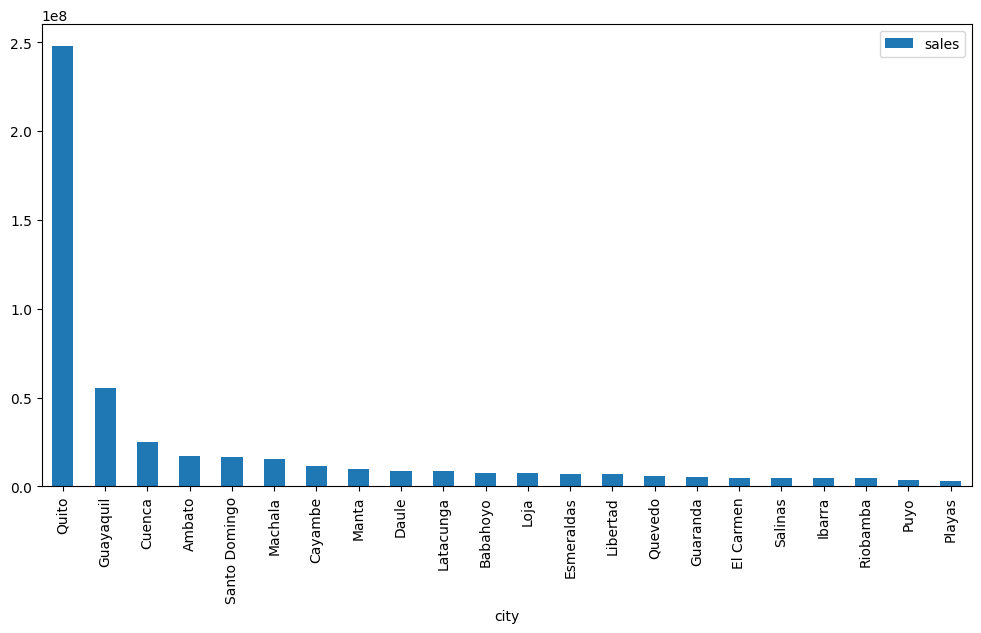

In [17]:
# Group joined DF by city, calculate sales by city, create bar plot from highest to lowest

(retail_stores
 .groupby(["city"])
 .agg({"sales": "sum"})
 .sort_values(by="sales", ascending=False
).plot.bar(figsize=(12, 6)))

<Axes: xlabel='date'>

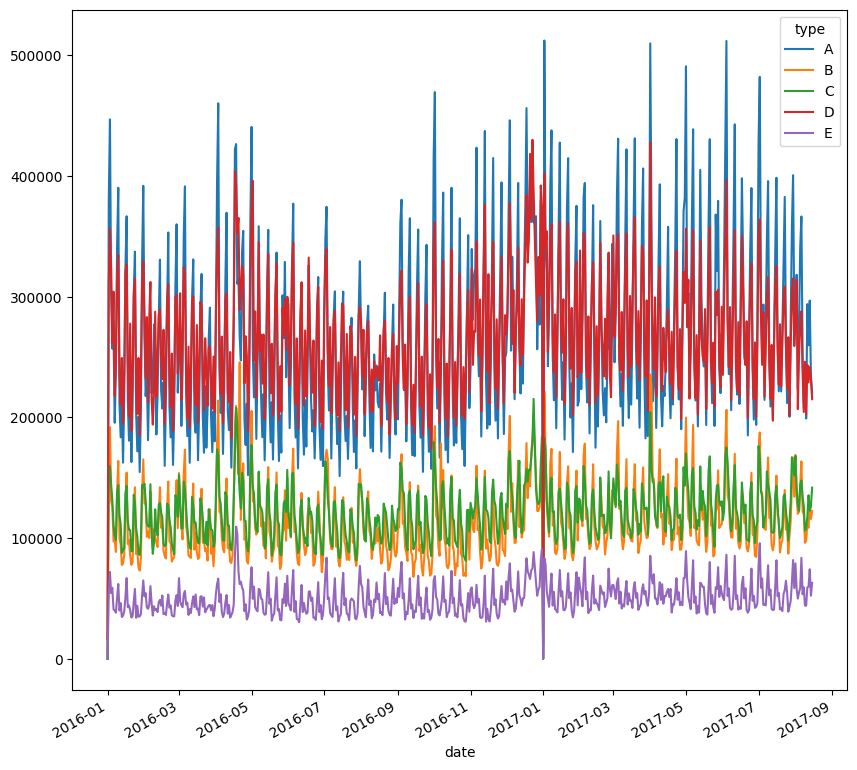

In [18]:
# Create pivot table with date in index and type as column, cells are sum sales for type/day
# then create a line plot with increased figure size

retail_stores.pivot_table(
    index=["date"], 
    columns="type", 
    values="sales", 
    aggfunc="sum"
).plot(figsize=(10, 10))

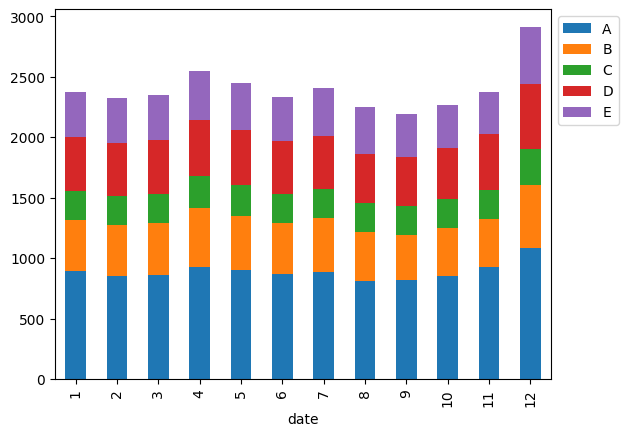

In [19]:
# Create pivot table with type in index and month as column, cells are sum sales for type/day
# Note: You may have chosen row as month and type as column, that's fine too!

retail_stores.pivot_table(
    index="type", 
    columns=retail_stores["date"].dt.month, 
    values="sales", 
    aggfunc="mean"
).T.plot.bar(stacked=True).legend(bbox_to_anchor=(1, 1)) # T / transpose flips the DataFrame by its axes (quickly reorienting the dataframe and swapping the axes)

In [20]:
# Delete DataFrames used in join

del [retail, stores]